# Data Science Project: Planning Stage (Individual)
*Problem: Predicting Usage of a Video Game Research Server*
Student Name: Alessandra Custodio
Student Number: 5117

# 1. Data Description

## 1.1) Loading in the data

In [1]:
getwd()

[1] "/home/jovyan/work/swaggest-pino"

In [2]:
list.files()

[1] "Data Description.ipynb"               
[2] "Exploring relationships in data.ipynb"
[3] "Individual Planning Project"          
[4] "Individual Planning Project.ipynb"    
[5] "players.csv"                          
[6] "README.md"                            
[7] "sessions.csv"                         
[8] "untitled.txt"

In [3]:
library(tidyverse)
sessions_original <- read_csv("sessions.csv")
players_original <- read_csv("players.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter:

In [4]:
print(players_original, rows = 10)
print(sessions_original, rows = 10)

# A tibble: 196 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Veteran    FALSE     b674dd7ee0d24096d1c0196…          0   Blake Male      17
 4 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 5 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 6 Amateur    TRUE      f58aad5996a435f16b0284a…          0   Adri… Female    17
 7 Regular    TRUE      8e594b8953193b26f498db9…          0   Luna  Female    19
 8 Amateur    FALSE     1d2371d8a35c8831034b25b…          0   Emer… Male      21
 9 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      47
10 Veteran    TRUE      bbe2d83de678f519c4b3daa…          0   Nyla  Female    22
# ℹ 186 

In [5]:
players_original <- tibble(players_original)

In [6]:
#(this is just the selection of variables i'll be using later, just thought it was more tidy to store it up here)
player_data <- players_original |>
    select(experience, subscribe, played_hours, gender, Age)
print(player_data, rows = 10)

# A tibble: 196 × 5
   experience subscribe played_hours gender   Age
   <chr>      <lgl>            <dbl> <chr>  <dbl>
 1 Pro        TRUE              30.3 Male       9
 2 Veteran    TRUE               3.8 Male      17
 3 Veteran    FALSE              0   Male      17
 4 Amateur    TRUE               0.7 Female    21
 5 Regular    TRUE               0.1 Male      21
 6 Amateur    TRUE               0   Female    17
 7 Regular    TRUE               0   Female    19
 8 Amateur    FALSE              0   Male      21
 9 Amateur    TRUE               0.1 Male      47
10 Veteran    TRUE               0   Female    22
# ℹ 186 more rows


## 1.2) Numbers of observations/variables in the players.csv dataset

In [7]:
#number of observations/variables (given from source, unaltered):
n_players.csv <- nrow(players_original)
p_players.csv <- ncol(players_original)
cat("players.csv:", n_players.csv, "rows,", p_players.csv, "columns\n")

players.csv: 196 rows, 7 columns


Therefore, in players.csv, there are: 
- 196 observations
- 7 variables

## 1.3) Variable names, types, and descriptions

In [8]:
desc_of_vars <- c(
    "How the player identifies in gaming experience level",
    "Whether player has subscribed to the newsletter (True or false)",
    "Email address of player",
    "Total time spent in the game (in hours)",
    "Name of player",
    "Gender of player",
    "Age of player (in years)")
   
description_players <- tibble(
    variable = names(players_original),
    type = map_chr(players_original, ~class(.x)[1]),
    description = desc_of_vars)

description_players

variable,type,description
<chr>,<chr>,<chr>
experience,character,How the player identifies in gaming experience level
subscribe,logical,Whether player has subscribed to the newsletter (True or false)
hashedEmail,character,Email address of player
played_hours,numeric,Total time spent in the game (in hours)
name,character,Name of player
gender,character,Gender of player
Age,numeric,Age of player (in years)


#### potential issues
- played_hours: may have extreme outliers
- Age: may have missing values?
- hashedEmail, name: no serious issue but irrelevant to data analysis
- may have inconsistent or duplicated entries

#### possible hidden issues
- "experience" variable is highly biased depending on the person
- sampling bias: only includes players around a certain area
- playtime records may not be accurate due to issues with technology, for example, if playtime was recorded using built-in game timers
- is playtime defined by active play, or even idle/afk play?

#### how the data were collected
- The dataset doesn't specify specificaclly how the data was collected. However, one can assume that the data was taken from activity reports/logs in-game, automatically recorded by the system

## 1.4) Summary Statistics

In [9]:
summary(players_original)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Definitions of each term (from the above summary of the dataset):
- length = (in this context) how many rows are in the column
- class = What type of R object it is (category, e.g. numeric, factor, character)
- Mode = how the data is stored in memory (e.g. numeric, character, logical, list)
- Mean = average value
- Median = middle value
- Min/Max = Smallest/largest values
- 1st Qu. = first quarter of the data (first 25% of the dataset), and so on for 2nd, 3rd, 4th Qu.

## 1.5) Means of each numeric variable

In [10]:
numeric_players_data_only <- players_original |>
    select(played_hours, Age)

mean_table <- numeric_players_data_only |>
    summarise(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2))) |>
    pivot_longer(everything(), names_to = "variable", values_to = "mean")

mean_table

variable,mean
<chr>,<dbl>
played_hours,5.85
Age,21.14


The average hours played is 5.85 hours, and the average age is 21.14 years.

# 2) Questions:
#### 2.1) Broad Question Prompt from assignment: 
What player characteristics and behaviours are predictive of subscribing to the game-related newsletter?

#### 2.2) Specific Question I formulated: 
Can player demographics and play behaviour (ex: total playtime, number of sessions, player type) predict whether a player subscribes to the newsletter?

#### 2.3) Dataset to be used: players.csv
(since sessions.csv only has data relevant to playtime analyses, while I want to figure out how player newsletter subscription relates to variables like experience, time, and age in each player. The data table I made from earlier in #1.1 is player_data, instead of players_original)

# 3. Exploratory Data Analysis and Visualization

**Specific Question to ask about the data:**
can player demographics and play-behaviour (total playtime, player age, experience, gender) predict whether a player subscribes to the newsletter?

## Exploratory Visualizations

### 3.1) Newsletter Subscription Status by Playtime and Age?

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


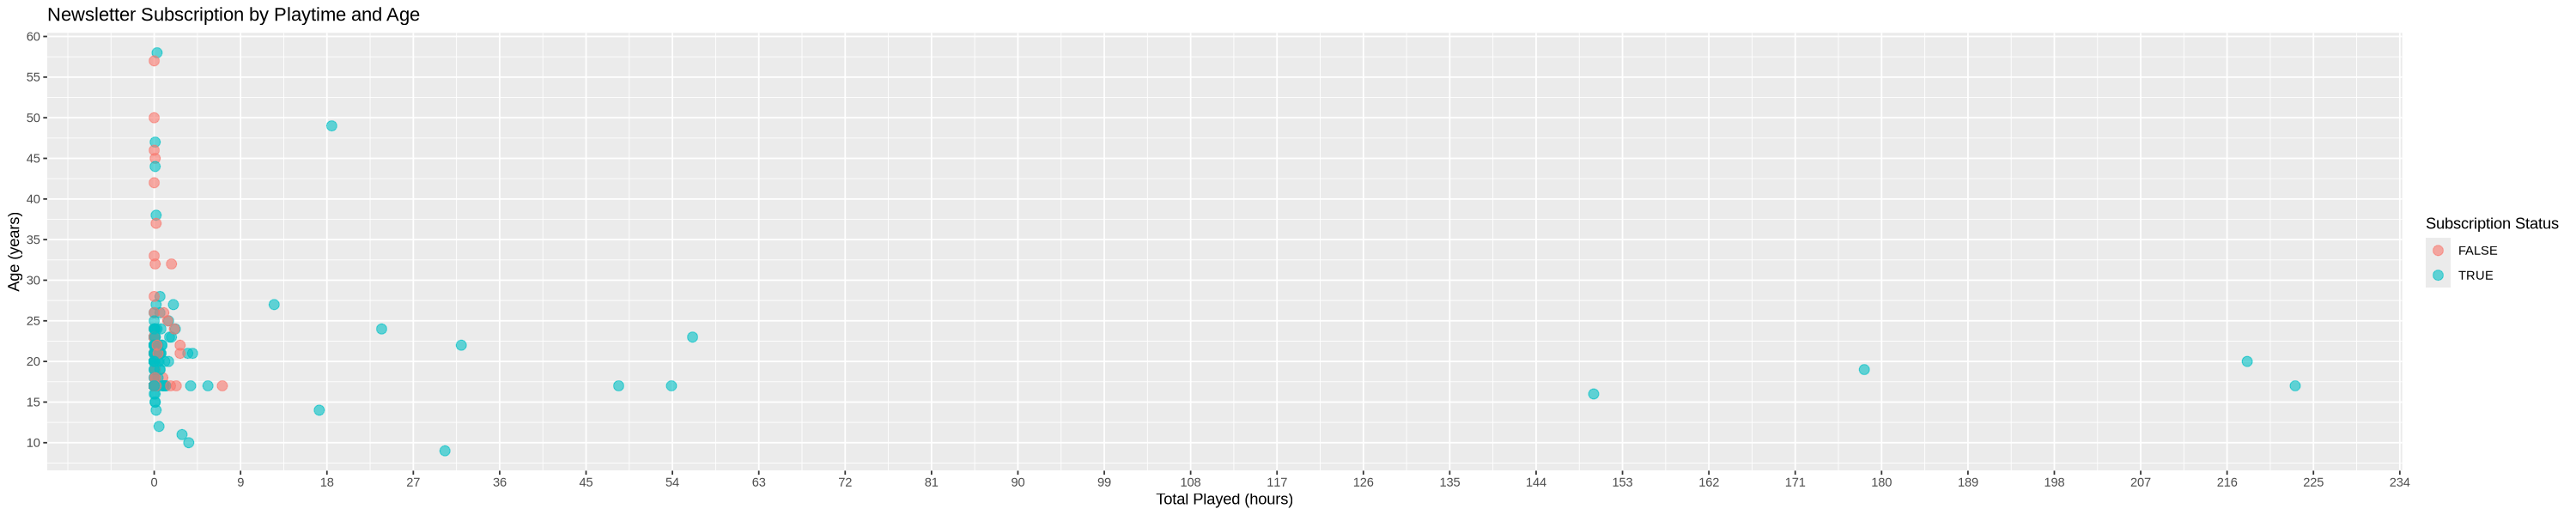

In [11]:
library(ggplot2)
options(repr.plot.width = 25, repr.plot.height = 5)

age_and_played_time <- ggplot(player_data, aes(x=played_hours, y= Age, color = subscribe)) +
    geom_point(alpha = 0.6, size = 3) +
    labs(title = "Newsletter Subscription by Playtime and Age",
         x = "Total Played (hours)",
         y = "Age (years)",
         color = "Subscription Status") 

age_and_played_time + 
    scale_x_continuous(breaks = seq(0,1000, by = 9)) +
    scale_y_continuous(breaks = seq(0,1000, by = 5))

Notes: 
- when total playtime is around 3 hours or more, players tend to subscribe to the newsletter
- despite low playtime (<2.5 hours), players between the ages of roughly 12-38 show a relatively high subscription rate

other points:
- the older the player, the lesser playtime
- the younger the player (~9-27), the more playtime

Conclude that:
- Older players are generally less likely to subscribe to the newsletter
- Increased playtime is associated with a higher chance of newletter subscription

*This plot suggests a positive relationship between total playtime and likelihood of subscription. However, age appears to have a negative association with subscription lieklihoood, particularly among older players*

Now I will compare the other variables' relations to subscription status.

In [12]:
player_data

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,47


### 3.2) Newsletter Subscription Rate by Gender?

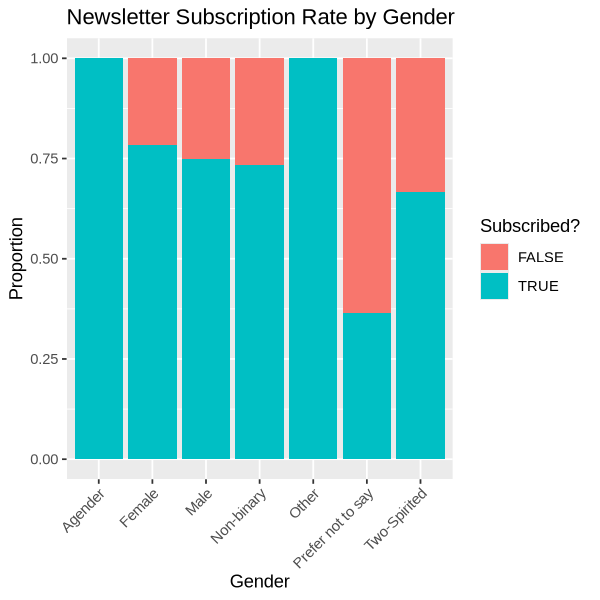

In [13]:
options(repr.plot.width = 5, repr.plot.height = 5)
gender.vs.subscription <- player_data |>
    ggplot(aes(x=gender, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(title = "Newsletter Subscription Rate by Gender",
         y = "Proportion",
         x = "Gender",
         fill = "Subscribed?") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


print(gender.vs.subscription)

From this data, gender does not appear to have a significant relationship with the likelihood newsletter subscription. The differences in subscription rates across gender identities do not suggest any clear pattern. Any interpretationo here would risk over-claiming or implying casual relationships that the data does not support. Because of this, gender doesn't appear to be a useful predictor for subscription behaviour, and is likely irrelevant for the analysis.

### 3.3) Newsletter Subscription Rate by Experience?

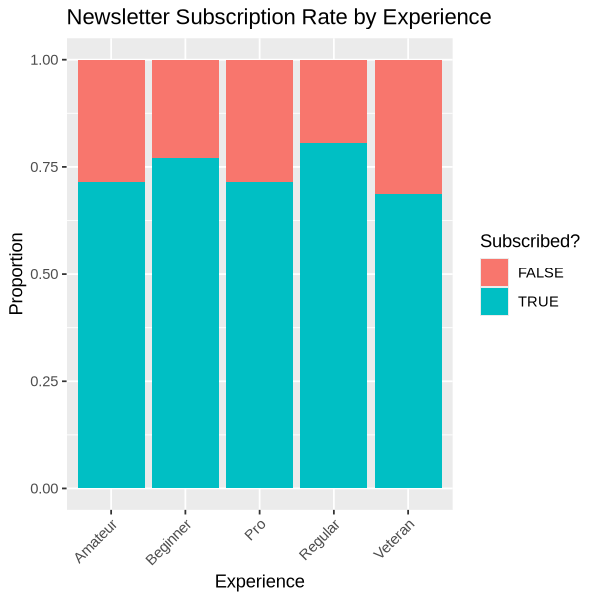

In [14]:
options(repr.plot.width = 5, repr.plot.height = 5)
experience.vs.subscription <- player_data |>
    ggplot(aes(x=experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(title = "Newsletter Subscription Rate by Experience",
         y = "Proportion",
         x = "Experience",
         fill = "Subscribed?") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


print(experience.vs.subscription)

From this data, experience levels among players also doesn't seem to have a notable relationship with newsletter subscription status. There is little difference of subscription percentages among the experience categories--roughly 75% subscribe, and ~25% don't, across every category. The experience of a player does not appear to meaningfully affect whether or not one subscribes to the newsletter.

# 4) Methods and Plan

**Reminder of the specific question to ask about the data:** can player demographics and play-behaviour (total playtime, player age, experience, gender) predict whether a player subscribes to the newsletter?

So far, we have established that total playtime and age are valid variables that may be able to predict whether or not a play subscribes to the newsletter. For the next step, I believe that it is the best choice to build a KNN Classifier that predicts a player's newsletter subscription status based off their age and playtime.
  - This method is appropriate because we are trying to predict a binary result (Newsletter Subscription: True/False), which can be visualized by colour, while also displaying how the predicting numerical variables (Age and Playtime) relate to it.
  - It's efficient and easily interpretable.

To apply to the method selected, several assumptions must be made:
  -   Hours of playtime are recorded in active gameplay, excluding idle/pause activity
  -   No duplicates in data/errors with recorded ages or playtimes

Potential limitations/weaknesses of the method selected:
- may be influenced by class imbalance

How to compare and select the model?
- Split player_data into 70% training, 30% testing, stratified by the subscription status (so both sets keep the same proportion of subscribers vs non subscribers)
- Use 5-fold cross validation on training to tune the best value of k (number of neighbours)
- Compare models (with different k values) using:
- - accuracy: overall proportion of correct predictions
  - precision/recall: if class imbalance exists
- select the model (best k) that gives the highest cross-validation accuracy on the training set
- evaluate the chosen model on the test set to get an accurate, real-world result 

# 5) GitHub Repository 
https://github.com/acusto27/swaggest-pino